## Step: Loading the cleaned dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def load_data():
    df_train = pd.read_csv('dataset/cleaned_train.csv')
    df_test = pd.read_csv('dataset/test.csv', encoding = "ISO-8859-1")

    return df_train, df_test

In [3]:
df_train, df_test = load_data()

In [4]:
df_train.shape

(250305, 11)

In [5]:
df_train.isnull().sum()

ticket_id          0
city               0
agency_name        0
violation_code     0
disposition        0
fine_amount        0
judgment_amount    0
late_fee           0
admin_fee          0
discount_amount    0
compliance         0
dtype: int64

In [6]:
df_train.head()

,ticket_id,city,agency_name,violation_code,disposition,fine_amount,judgment_amount,late_fee,admin_fee,discount_amount,compliance
0,22056,4,1,1,1,250.0,305.0,25.0,20.0,0,0.0
1,27586,1,1,7,4,750.0,855.0,75.0,20.0,0,1.0
2,22062,1,1,1,2,250.0,0.0,0.0,0.0,0,0.0
3,22084,1,1,1,2,250.0,0.0,0.0,0.0,0,0.0
4,22093,1,1,1,2,250.0,0.0,0.0,0.0,0,0.0


In [7]:
X = df_train[df_train.columns[1:-1]]
y = df_train['compliance']

In [8]:
#scaler = MinMaxScaler()
#X_train_norm = scaler.fit_transform(X_train)
#X_dev_norm = scaler.transform(X_dev)

### PCA for Data Visualization

In [218]:
features = list(df_train.columns[1:-1])
#print(features)

x_pca = df_train.loc[:, features].values
y_pca = df_train.loc[:, ['compliance']].values

#scaler = MinMaxScaler()
scaler = StandardScaler()
x_pac = scaler.fit_transform(x_pca)

In [239]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x_pac)

principalDf = pd.DataFrame(data=principalComponents, columns=['comp1', 'comp2', 'comp3', 'comp4'])

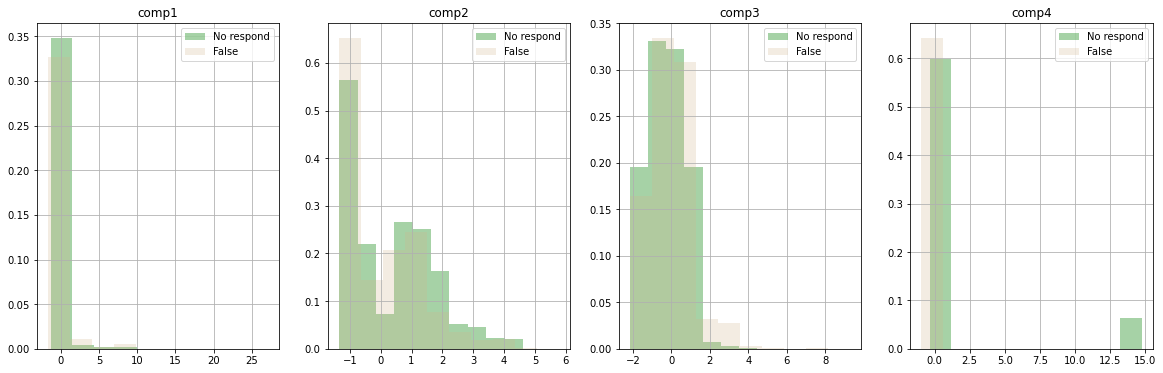

In [240]:
finalDf = pd.concat([principalDf, df_train[['compliance']]], axis = 1)

var = ['comp1', 'comp2', 'comp3', 'comp4']
finalDf_paid = finalDf[finalDf.compliance == 1]
finalDf_nopay = finalDf[finalDf.compliance == 0]

plt.subplots(1, 4, figsize=(20, 6))

for i, var in enumerate(var):
    plt.subplot(1, 4, i+1)
    finalDf_paid[var].hist(alpha=0.35, density=True, color='green', label='No respond')
    finalDf_nopay[var].hist(alpha=0.25, density=True, color='tan', label='False')
    plt.title(var)
    plt.legend()

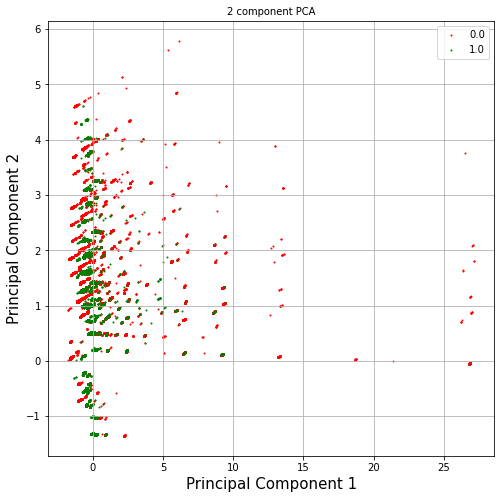

In [227]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 10)
targets = [0.0, 1.0]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['compliance'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'comp1']
               , finalDf.loc[indicesToKeep, 'comp2']
               , c = color
               , s = 1)
ax.legend(targets)
ax.grid()

### t-SNE for Data Visualization

In [241]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30.0, n_iter=400, verbose=1).fit_transform(df_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 250305 samples in 2.664s...
[t-SNE] Computed neighbors for 250305 samples in 10.202s...
[t-SNE] Computed conditional probabilities for sample 1000 / 250305
[t-SNE] Computed conditional probabilities for sample 2000 / 250305
[t-SNE] Computed conditional probabilities for sample 3000 / 250305
[t-SNE] Computed conditional probabilities for sample 4000 / 250305
[t-SNE] Computed conditional probabilities for sample 5000 / 250305
[t-SNE] Computed conditional probabilities for sample 6000 / 250305
[t-SNE] Computed conditional probabilities for sample 7000 / 250305
[t-SNE] Computed conditional probabilities for sample 8000 / 250305
[t-SNE] Computed conditional probabilities for sample 9000 / 250305
[t-SNE] Computed conditional probabilities for sample 10000 / 250305
[t-SNE] Computed conditional probabilities for sample 11000 / 250305
[t-SNE] Computed conditional probabilities for sample 12000 / 250305
[t-SNE] Computed conditional probab

[t-SNE] Computed conditional probabilities for sample 119000 / 250305
[t-SNE] Computed conditional probabilities for sample 120000 / 250305
[t-SNE] Computed conditional probabilities for sample 121000 / 250305
[t-SNE] Computed conditional probabilities for sample 122000 / 250305
[t-SNE] Computed conditional probabilities for sample 123000 / 250305
[t-SNE] Computed conditional probabilities for sample 124000 / 250305
[t-SNE] Computed conditional probabilities for sample 125000 / 250305
[t-SNE] Computed conditional probabilities for sample 126000 / 250305
[t-SNE] Computed conditional probabilities for sample 127000 / 250305
[t-SNE] Computed conditional probabilities for sample 128000 / 250305
[t-SNE] Computed conditional probabilities for sample 129000 / 250305
[t-SNE] Computed conditional probabilities for sample 130000 / 250305
[t-SNE] Computed conditional probabilities for sample 131000 / 250305
[t-SNE] Computed conditional probabilities for sample 132000 / 250305
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 238000 / 250305
[t-SNE] Computed conditional probabilities for sample 239000 / 250305
[t-SNE] Computed conditional probabilities for sample 240000 / 250305
[t-SNE] Computed conditional probabilities for sample 241000 / 250305
[t-SNE] Computed conditional probabilities for sample 242000 / 250305
[t-SNE] Computed conditional probabilities for sample 243000 / 250305
[t-SNE] Computed conditional probabilities for sample 244000 / 250305
[t-SNE] Computed conditional probabilities for sample 245000 / 250305
[t-SNE] Computed conditional probabilities for sample 246000 / 250305
[t-SNE] Computed conditional probabilities for sample 247000 / 250305
[t-SNE] Computed conditional probabilities for sample 248000 / 250305
[t-SNE] Computed conditional probabilities for sample 249000 / 250305
[t-SNE] Computed conditional probabilities for sample 250000 / 250305
[t-SNE] Computed conditional probabilities for sample 250305 / 250305
[t-SNE] Mean sigma: 

In [249]:
finalDf['dim1'] = tsne[:, 0]
finalDf['dim2'] = tsne[:, 1]
finalDf

,comp1,comp2,comp3,comp4,compliance,dim1,dim2
0,0.270771,-1.316760,-0.622192,0.133537,0.0,40.438282,11.530447
1,1.040324,1.233821,1.160597,0.225329,1.0,10.307441,-19.607647
2,-1.071330,-0.730685,1.200327,-0.252411,0.0,-1.047583,-20.140102
3,-1.071330,-0.730685,1.200327,-0.252411,0.0,-1.028925,-20.131380
4,-1.071330,-0.730685,1.200327,-0.252411,0.0,-1.022936,-20.128544
...,...,...,...,...,...,...,...
250300,-0.479802,1.164542,1.007933,-0.390436,0.0,0.220066,-13.399102
250301,-0.479802,1.164542,1.007933,-0.390436,0.0,0.220067,-13.399102
250302,-0.479802,1.164542,1.007933,-0.390436,0.0,0.220067,-13.399102
250303,-0.479802,1.164542,1.007933,-0.390436,0.0,0.220067,-13.399103


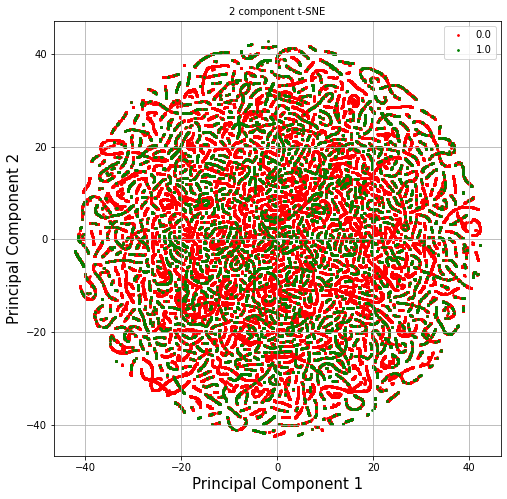

In [254]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component t-SNE', fontsize = 10)
targets = [0.0, 1.0]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['compliance'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'dim1']
               , finalDf.loc[indicesToKeep, 'dim2']
               , c = color
               , s = 3)
ax.legend(targets)
ax.grid()

## Step: Apply modelling algorithms

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.kernel_approximation import RBFSampler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, roc_curve, auc, plot_roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

## Resampling dataset

In [10]:
df_true = df_train[df_train.compliance == 1]
df_false = df_train[df_train.compliance != 1]
#df_null = df_train[df_train.compliance == -1]

#df_train.compliance.value_counts()
count_nopay, count_paid = df_train.compliance.value_counts()
print(count_paid, count_nopay)

11597 238708


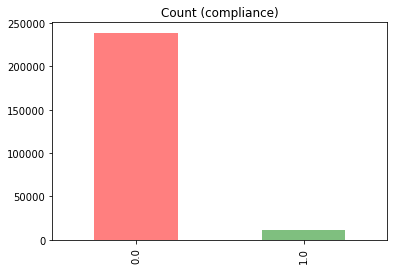

In [41]:
df_train.compliance.value_counts().plot(kind='bar', title='Count (compliance)', color=['red', 'green'], alpha=0.5);

### Random under-sesampling

Random under-sampling:
1.0    11597
0.0    11597
Name: compliance, dtype: int64


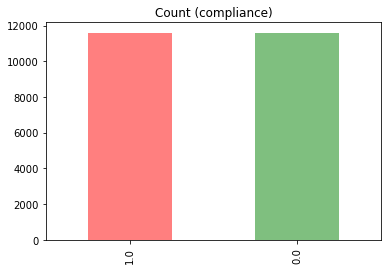

In [42]:
df_false_under = df_false.sample(count_paid)
df_train_under = pd.concat([df_false_under, df_true], axis=0)

print('Random under-sampling:')
print(df_train_under.compliance.value_counts())

df_train_under.compliance.value_counts().plot(kind='bar', title='Count (compliance)', color=['red', 'green'], alpha=0.5);

### Random over-sesampling

Random under-sampling:
1.0    238708
0.0    238708
Name: compliance, dtype: int64


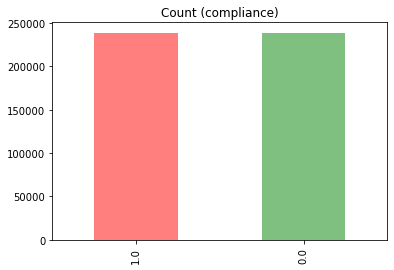

In [43]:
df_train_over = pd.concat([df_false, df_true.sample(count_nopay, replace=True)], axis=0)

print('Random under-sampling:')
print(df_train_over.compliance.value_counts())

df_train_over.compliance.value_counts().plot(kind='bar', title='Count (compliance)', color=['red', 'green'], alpha=0.5);

### Python imblanced-learn module

In [9]:
import imblearn
print(imblearn.__version__)

0.7.0


### Random under-sampling and over-sampling with imbalanced-learn

In [10]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_sample(X, y)

### Under-sampling: Tomek links

In [11]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_tl, y_tl = tl.fit_sample(X, y)

### Under-sampling: Cluster Centroids

In [92]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy={0: 10})
X_cc, y_cc = cc.fit_sample(X, y)

In [12]:
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=1, n_neighbors=3)
X_nm1, y_nm1 = undersample.fit_resample(X, y)

In [ ]:
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=2, n_neighbors=3)
X_nm2, y_nm2 = undersample.fit_resample(X, y)

In [ ]:
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=3, n_neighbors=3)
X_nm3, y_nm3 = undersample.fit_resample(X, y)

In [13]:
from imblearn.under_sampling import EditedNearestNeighbours

undersample = EditedNearestNeighbours(n_neighbors=3)
X_enn, y_enn = undersample.fit_resample(X, y)

In [14]:
from imblearn.under_sampling import OneSidedSelection

undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
X_oss, y_oss = undersample.fit_resample(X, y)

In [15]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
X_ncr, y_ncr = undersample.fit_resample(X, y)

### Over-sampling: SMOTE

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_sm, y_sm = smote.fit_sample(X, y)

### Over-sampling followed by under-sampling: STMOTE and Tomek

In [17]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto', random_state=0)
X_smt, y_smt = smt.fit_sample(X, y)

### Ready for training

In [18]:
def modelFit(X_train, X_dev, y_train, y_dev, clf, cv=5):
    clf = clf.fit(X_train, y_train)

    #ax = plt.gca()
    #roc = plot_roc_curve(clf, X_dev, y_dev, ax=ax, alpha=0.8)
    #plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    #plt.show()

    cv = cross_val_score(clf, X_dev, y_dev, cv=cv, scoring = 'roc_auc')
    cv_mean = round(cv.mean(), 3)
    cv_std = round(cv.std(), 3)
    print('Cross-validation (AUC)', cv, ', mean =', cv_mean, ', std =', cv_std)
    
    #conf_mat = confusion_matrix(y_true=y_dev, y_pred=clf.predict(X_dev))
    #print("Confusion matrix:\n", conf_mat)
    
    #acc = accuracy_score(y_dev, clf.predict(X_dev))
    #print("Accuracy: %.2f%%" %(acc *100.0))

    return cv_mean, cv_std

In [19]:
X_train, X_dev, y_train, y_dev = train_test_split(X, y, random_state=0, test_size=0.05)
X_train_rus, X_dev_rus, y_train_rus, y_dev_rus = train_test_split(X_rus, y_rus, random_state=0, test_size=0.05)
#X_train_tl, X_dev_tl, y_train_tl, y_dev_tl = train_test_split(X_cc, y_cc, random_state=0, test_size=0.05)
#X_train_cc, X_dev_cc, y_train_cc, y_dev_cc = train_test_split(X_cc, y_cc, random_state=0, test_size=0.05)
X_train_nm1, X_dev_nm1, y_train_nm1, y_dev_nm1 = train_test_split(X_nm1, y_nm1, random_state=0, test_size=0.05)
#X_train_nm2, X_dev_nm2, y_train_nm2, y_dev_nm2 = train_test_split(X_nm2, y_nm2, random_state=0, test_size=0.05)
#X_train_nm3, X_dev_nm3, y_train_nm3, y_dev_nm3 = train_test_split(X_nm3, y_nm3, random_state=0, test_size=0.05)
X_train_enn, X_dev_enn, y_train_enn, y_dev_enn = train_test_split(X_enn, y_enn, random_state=0, test_size=0.05)
X_train_oss, X_dev_oss, y_train_oss, y_dev_oss = train_test_split(X_oss, y_oss, random_state=0, test_size=0.05)
X_train_ncr, X_dev_ncr, y_train_ncr, y_dev_ncr = train_test_split(X_ncr, y_ncr, random_state=0, test_size=0.05)
X_train_sm, X_dev_sm, y_train_sm, y_dev_sm = train_test_split(X_sm, y_sm, random_state=0, test_size=0.05)
X_train_smt, X_dev_smt, y_train_smt, y_dev_smt = train_test_split(X_smt, y_smt, random_state=0, test_size=0.05)

In [20]:
clf_XGB = XGBClassifier()

In [28]:
auc_mean_baseline, auc_std_baseline = modelFit(X_train, X_dev, y_train, y_dev, clf_XGB, cv=50)

Cross-validation (AUC) [0.78506787 0.94602456 0.85374919 0.91531997 0.89964447 0.92792502
 0.84954751 0.90239173 0.86829347 0.81011635 0.91758242 0.87039431
 0.94974144 0.92275372 0.93148028 0.86732385 0.83823529 0.93977591
 0.83648459 0.89898459 0.79604342 0.90651261 0.94205182 0.90738796
 0.85119048 0.87044818 0.86537115 0.90581232 0.87009804 0.81932773
 0.82072829 0.84348739 0.89653361 0.87710084 0.83946078 0.85661765
 0.93890056 0.80357143 0.73686975 0.83315826 0.8644958  0.88655462
 0.91088936 0.7797619  0.83315826 0.86309524 0.87482493 0.92769608
 0.92064265 0.82083739] , mean = 0.872 , std = 0.049


In [29]:
auc_mean_rus, auc_std_rus = modelFit(X_train_rus, X_dev_rus, y_train_rus, y_dev_rus, clf_XGB, cv=50)

Cross-validation (AUC) [0.89583333 0.79861111 0.84375    0.85416667 0.83680556 0.95138889
 0.88194444 0.85416667 0.87152778 0.82986111 0.78030303 0.95833333
 1.         0.90530303 0.86742424 0.88636364 0.80681818 0.70833333
 0.82575758 0.83333333 0.88636364 0.80681818 0.92045455 0.86363636
 0.90909091 0.82954545 0.78409091 0.95454545 0.81060606 0.96212121
 0.91666667 0.85984848 0.96212121 0.84090909 0.79545455 0.82575758
 0.88257576 0.85606061 0.80681818 0.97348485 0.8030303  0.88257576
 0.92045455 0.87121212 0.90530303 0.78030303 0.89015152 0.65530303
 0.91666667 0.85227273] , mean = 0.862 , std = 0.066


In [32]:
auc_mean_nm1, auc_std_nm1 = modelFit(X_train_nm1, X_dev_nm1, y_train_nm1, y_dev_nm1, clf_XGB, cv=50)

Cross-validation (AUC) [0.8125     0.73263889 0.85069444 0.82638889 0.79513889 0.84375
 0.87847222 0.75       0.84722222 0.71180556 0.70454545 0.9469697
 0.95454545 0.85984848 0.78030303 0.66666667 0.59848485 0.59469697
 0.86363636 0.84469697 0.71969697 0.8219697  0.83333333 0.64393939
 0.875      0.73863636 0.86742424 0.85606061 0.68181818 0.87878788
 0.92424242 0.83333333 0.9280303  0.83712121 0.77651515 0.75378788
 0.85984848 0.83333333 0.74242424 0.82954545 0.79545455 0.78787879
 0.81060606 0.94318182 0.90530303 0.77651515 0.84848485 0.67045455
 0.72727273 0.92045455] , mean = 0.806 , std = 0.087


In [22]:
auc_mean_enn, auc_std_enn = modelFit(X_train_enn, X_dev_enn, y_train_enn, y_dev_enn, clf_XGB, cv=50)

Cross-validation (AUC) [0.90176648 0.9133994  0.86018957 0.91059888 0.87419216 0.91770788
 0.96359328 0.82744507 0.955838   0.84058595 0.89250323 0.83261525
 0.90068936 0.85114175 0.84206349 0.85396825 0.82777778 0.95873016
 0.9468254  0.88492063 0.95297619 0.90436508 0.93710317 0.90119048
 0.94980159 0.96686508 0.88095238 0.92857143 0.92083333 0.9422619
 0.94960317 0.95039683 0.92638889 0.90595238 0.90753968 0.93373016
 0.92956349 0.925      0.84880952 0.90198413 0.86924603 0.96587302
 0.90674603 0.83412698 0.87460317 0.81309524 0.91190476 0.89069264
 0.87554113 0.86320346] , mean = 0.901 , std = 0.042


In [23]:
auc_mean_oss, auc_std_oss = modelFit(X_train_oss, X_dev_oss, y_train_oss, y_dev_oss, clf_XGB, cv=50)

Cross-validation (AUC) [0.77651515 0.79476584 0.82713499 0.8219697  0.89876033 0.90564738
 0.77582645 0.87396694 0.85055096 0.7964876  0.66081267 0.74586777
 0.8292011  0.79511019 0.98484848 0.82954545 0.72658402 0.82162534
 0.73209366 0.72348485 0.78615702 0.6511708  0.80819559 0.87431129
 0.86432507 0.81552163 0.89885496 0.70896947 0.78244275 0.75636132
 0.83333333 0.95992366 0.72041985 0.79993639 0.66094148 0.75127226
 0.85114504 0.87473976 0.83761277 0.8573907  0.81193616 0.85461485
 0.66065232 0.77307425 0.65163081 0.69535045 0.759195   0.75260236
 0.93372658 0.88549618] , mean = 0.801 , std = 0.079


In [24]:
auc_mean_ncr, auc_std_ncr = modelFit(X_train_ncr, X_dev_ncr, y_train_ncr, y_dev_ncr, clf_XGB, cv=50)

Cross-validation (AUC) [0.90049656 0.79411765 0.91424752 0.85618793 0.85064935 0.89362108
 0.91100076 0.85064935 0.82830405 0.80901451 0.9394576  0.84110008
 0.83537051 0.95187166 0.88846448 0.91787624 0.87851617 0.85232068
 0.81549674 0.96854622 0.84656694 0.85788262 0.87015727 0.86996548
 0.9357499  0.9556962  0.95723053 0.75968546 0.89835059 0.91004987
 0.88013042 0.93210587 0.96279248 0.83160721 0.90180284 0.8273878
 0.78289221 0.83007288 0.787687   0.9336402  0.86651323 0.94553126
 0.82796318 0.78365938 0.73283468 0.86766398 0.89873418 0.83966245
 0.89240506 0.79919448] , mean = 0.87 , std = 0.056


In [25]:
auc_mean_sm, auc_std_sm = modelFit(X_train_sm, X_dev_sm, y_train_sm, y_dev_sm, clf_XGB, cv=50)

Cross-validation (AUC) [0.83555684 0.89544269 0.86947844 0.8722622  0.89763993 0.87059019
 0.87294501 0.84279637 0.87926537 0.8826444  0.90756692 0.86768388
 0.89590665 0.88063099 0.87252482 0.88604969 0.87338271 0.88853581
 0.85548086 0.88689882 0.89995098 0.84734334 0.90224348 0.86868802
 0.8531806  0.87184401 0.86729958 0.90259318 0.90822785 0.87732947
 0.91559423 0.90630274 0.88056435 0.86622714 0.88017757 0.90332278
 0.88151371 0.87116737 0.89403129 0.86692159 0.88388713 0.88582103
 0.86964662 0.86894339 0.90289205 0.86356364 0.89318741 0.88780767
 0.8968794  0.88998769] , mean = 0.881 , std = 0.018


In [26]:
auc_mean_smt, auc_std_smt = modelFit(X_train_smt, X_dev_smt, y_train_smt, y_dev_smt, clf_XGB, cv=50)

Cross-validation (AUC) [0.88035789 0.87031622 0.85213265 0.88279171 0.88002521 0.86195546
 0.87470234 0.89290342 0.89387519 0.83683814 0.88985677 0.87620815
 0.8517562  0.8707452  0.86540482 0.8913976  0.89767474 0.88439382
 0.88247654 0.88928772 0.89505708 0.87476264 0.88260426 0.90417751
 0.89087664 0.87412089 0.8957381  0.88444159 0.89986989 0.89080632
 0.87573845 0.87989662 0.86870561 0.85470146 0.87106161 0.86742211
 0.88801955 0.87722414 0.86884122 0.86533322 0.89445226 0.86306488
 0.87866186 0.89925268 0.87002813 0.90883594 0.84830315 0.87180411
 0.86144716 0.86805873] , mean = 0.878 , std = 0.015


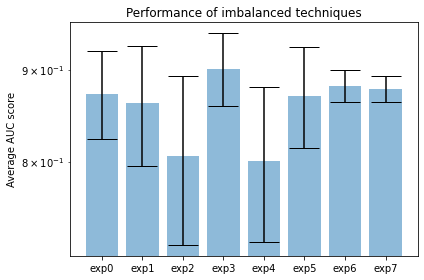

In [40]:
# Create lists for the plot
exps = ['Baseline', 'RandomUnderSampler', 'NearMiss', 'EditedNearestNeighbours', 'OneSidedSelection', 
        'NeighbourhoodCleaningRule', 'SMOTE', 'STMOTE + Tomek']
exps = ['exp0','exp1','exp2','exp3','exp4','exp5','exp6','exp7']
x_pos = np.arange(len(exps))
CTEs = [auc_mean_baseline, auc_mean_rus, auc_mean_nm1, auc_mean_enn, auc_mean_oss, auc_mean_ncr, auc_mean_sm, auc_mean_smt]
error = [auc_std_baseline, auc_std_rus, auc_std_nm1, auc_std_enn, auc_std_oss, auc_std_ncr, auc_std_sm, auc_std_smt]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=15)
ax.set_ylabel('Average AUC score')
ax.set_xticks(x_pos)
ax.set_xticklabels(exps)
ax.set_title('Performance of imbalanced techniques')
ax.yaxis.grid(True)
ax.set_yscale('log')

# Save the figure and show
plt.tight_layout()
plt.savefig('plots/imbalancedExp.png')
plt.show()